<a href="https://colab.research.google.com/github/mnaveed8167/Machine-Learning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# Loading the csv Data to Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last five rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Coorelation

1- Positive Coorelation

2- Negative Coorelation

In [ ]:
coorelation = gold_data.corr()

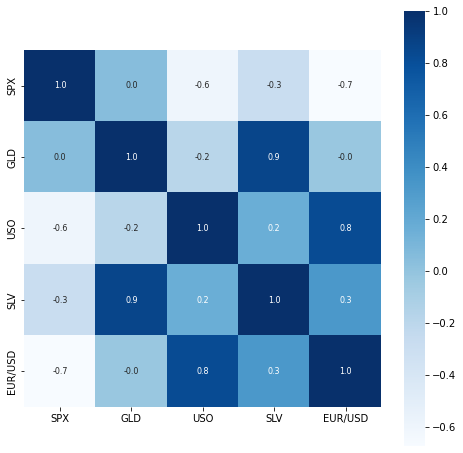

In [ ]:
# constructing a heat map to understand the coorelation
plt.figure(figsize = (8,8))
sns.heatmap(coorelation,cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [ ]:
# coorelation values of GLD
print(coorelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [ ]:
# check the distribution of gold price
sns.distplot(gold_data['GLD'],color = 'Blues')

NameError: ignored

In [ ]:
# Splitting the features and target
x = gold_data.drop(['Date','GLD'], axis = 1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

Model Training ---> Random Forest regressor

Ensemble Model

In [ ]:
regressor = RandomForestRegressor()


In [ ]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# Model Evaluation- Prediction on test data
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.55789934  82.02619994 116.25560043 127.62980084 120.51390112
 154.80859711 150.74599918 126.16540023 117.52109885 125.97030109
 116.62320119 171.43760067 141.83859807 167.53099862 115.28039996
 118.04910053 139.67610293 170.4388009  159.77750268 159.72529943
 155.21770028 125.20030011 175.09850033 157.58330309 125.29790017
  93.76649966  77.35660047 120.58410068 119.05729913 167.52869963
  88.20560076 125.3093998   91.16060035 117.62460073 121.02259905
 136.32380039 115.43870116 115.02670057 148.58929932 107.21500091
 104.79390279  87.04159767 126.57010063 117.50649962 153.17859878
 119.68620041 108.3621997  108.15349893  93.19720058 127.18669739
  74.99230044 113.60569867 121.22220009 111.30379901 118.81849895
 120.80509929 159.23139992 167.12180113 147.12469662  85.58549861
  94.22500064  86.74709927  90.52360021 119.08590072 126.39230054
 127.7436001  168.31149971 122.33139947 117.3477988   98.14739984
 168.84510222 142.80829856 132.38190183 121.16350219 121.15579927
 119.67680

In [ ]:
# R square error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R Square Error in point Score is:', error_score)

R Square Error in point Score is: 0.989090997047656


Compare actual and predicted values in plot

In [ ]:
y_test = list(y_test)

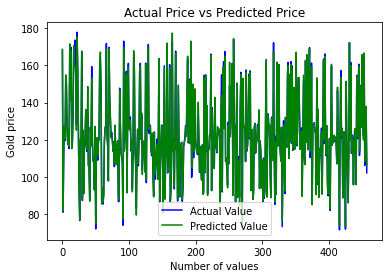

In [ ]:
plt.plot(y_test, color = 'blue', label= 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label= 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()